                       현대 팰리세이드  쌍용 렉스턴
Date                                   
2018-01-01/2018-01-07         0      42
2018-01-08/2018-01-14         0      18
2018-01-15/2018-01-21         0      32
2018-01-22/2018-01-28         0      25
2018-01-29/2018-02-04         0      22
                Open      High       Low     Close      Adj Close   Volume
Date                                                                      
2018-01-01  156000.0  156000.0  145500.0  149000.0  144135.593750  2577890
2018-01-08  148500.0  158000.0  147500.0  154000.0  148972.359375  2643772
2018-01-15  154000.0  162000.0  151000.0  162000.0  156711.171875  2081097
2018-01-22  162500.0  167500.0  149000.0  152500.0  147521.328125  3798731
2018-01-29  153000.0  164000.0  152000.0  162500.0  157194.859375  3180636
              Open    High     Low   Close  Adj Close   Volume
Date                                                          
2018-01-01  5120.0  5270.0  5120.0  5210.0     5210.0   609558
2018-0

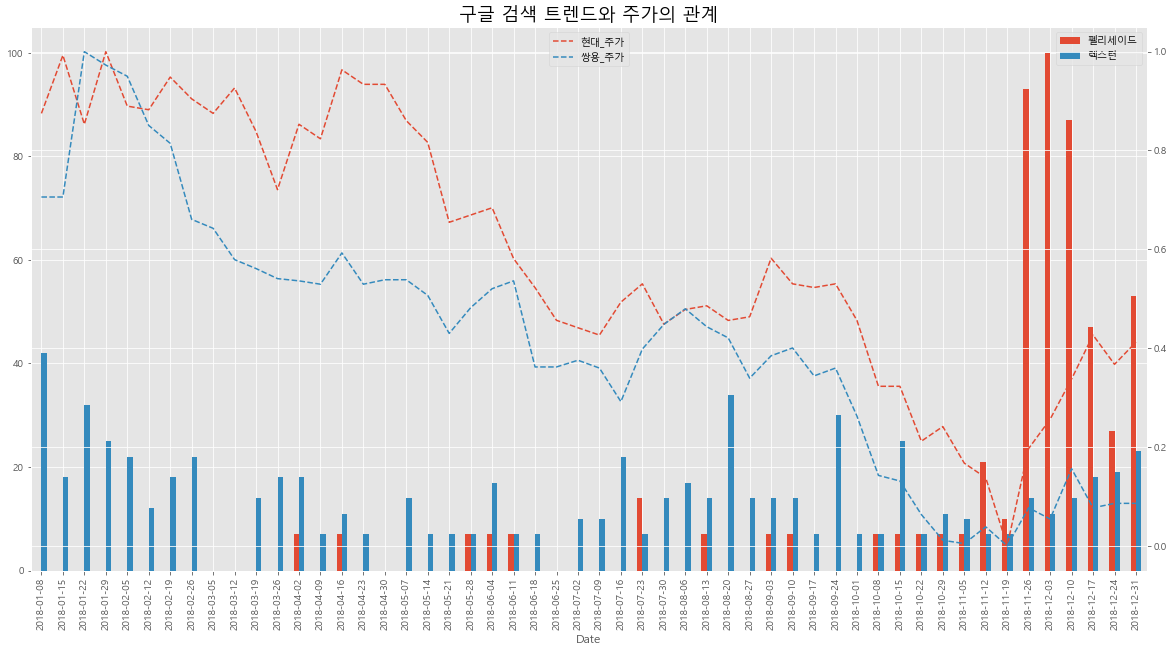

In [8]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import pandas as pd
import os

# 검색 keyword, 검색지역, 검색 기간 입력
keywords = ['현대 팰리세이드', '쌍용 렉스턴']
local_area = 'KR'
period = '2018-01-01 2018-12-31'

# Google Trend 접속 및 데이터 탑재
trend_obj = TrendReq()
trend_obj.build_payload(kw_list = keywords, timeframe=period, geo=local_area)
trend_df = trend_obj.interest_over_time()
trend_df = trend_df.reset_index()
# 일별 날짜 값이 들어있는 date열을 to_period() 메소드를 사용하여 기간으로 변환, freq 옵션을 W 로지했기 때문에 일주일 간격을 갖는 값으로 변환
trend_df["Date"] = trend_df['date'].dt.to_period(freq='W')
trend_df.set_index('Date', inplace = True)
trend_df.drop(['date', 'isPartial'], axis=1, inplace = True)
print(trend_df.head())

# 주가데이터- 야후 파이낸스에서 다운로드 받은 CSV 파일 가져오기
hd = pd.read_csv('./data/005380.KS.csv', index_col = 0, encoding='utf-8') # 현대자동차
sy = pd.read_csv('./data/003620.KS.csv', index_col = 0, encoding='utf-8') # 쌍용자동차
print(hd.head())
print(sy.head())

# 주가 데이터 스케일 조정(Min-Max 스케일 조정)
def min_max_scaler(x):
    return (x - x.min()) / (x.max() - x.min())

hd['Scaled_Adj'] = hd[['Adj Close']].apply(min_max_scaler)
sy['Scaled_Adj'] = sy[['Adj Close']].apply(min_max_scaler)
hd_df = hd.iloc[1:,:]
sy_df = sy.iloc[1:,:]
print(hd_df.head())

trend_df.index = hd_df.index
print(trend_df.head())

final_data = pd.concat([trend_df, hd_df['Scaled_Adj'], sy_df['Scaled_Adj']], axis=1)
final_data.columns = ['펠리세이드', '렉스턴', '현대_주가', '쌍용_주가']
print(final_data.head())

# maplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = os.path.join(os.getcwd(), 'C:\Windows\Fonts', "malgun.ttf" )
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 그래프 출력 및 저장
plt.style.use('ggplot')
ax1 = final_data[['펠리세이드', '렉스턴']].plot(kind='bar', figsize = (20,10))
ax2 = ax1.twinx()
final_data[['현대_주가', '쌍용_주가']].plot(ls='--', ax=ax2)
ax1.legend(loc='upper right')
ax2.legend(loc='upper center')
plt.title('구글 검색 트렌드와 주가의 관계', size = 18)

output_path = os.path.join(os.getcwd(), 'output', ' google_trend_stock_price.png')
plt.savefig(output_path, dpi=300)

plt.show()